# Final Project: Natalie Selmer and Shiv Patel

---

# Logistic Regression

In [ ]:
# Imports
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/data.csv', index_col = False)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#checking for null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data.shape

(569, 33)

In [ ]:
#Drop unnamed column with null values
data.fillna('0', axis =1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#Defining our feature and target variables
features = ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean",
            "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
            "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
           "smoothness_se", "compactness_se", "concavity_se","concave points_se", "symmetry_se",
           "fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst",
           "smoothness_worst", "compactness_worst","concavity_worst", "concave points_worst",
           "symmetry_worst", "fractal_dimension_worst"]

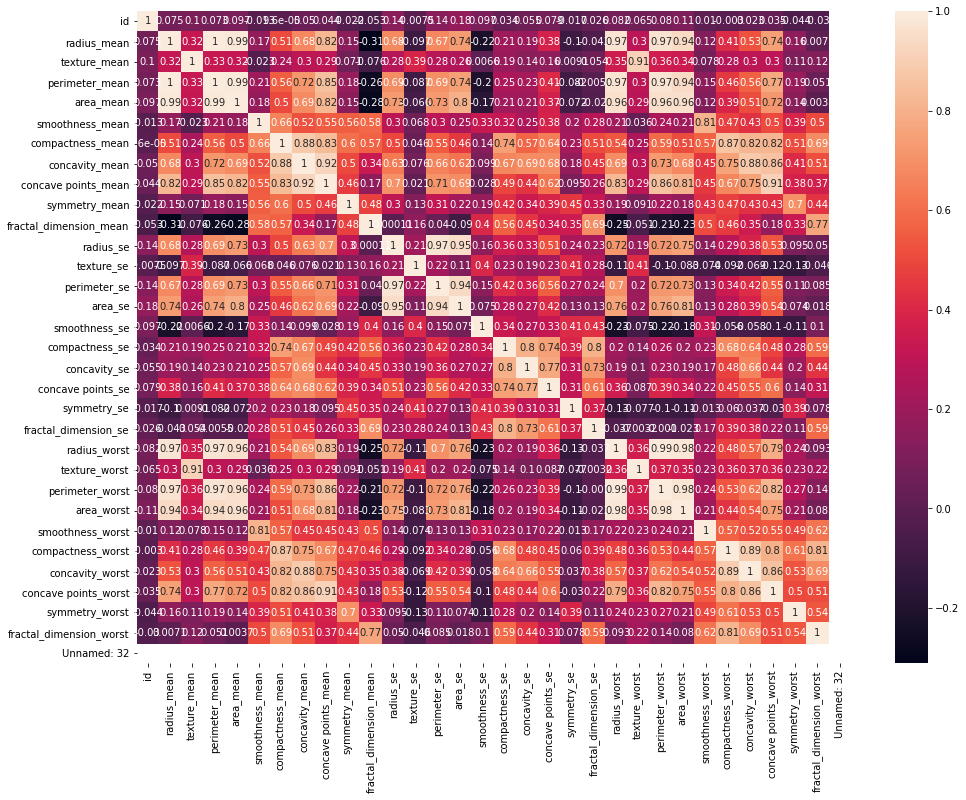

In [ ]:
# check heatmap for correlations
import seaborn as sns
plt.figure(figsize=(16, 12))
temp = data.copy()
sns.heatmap(temp.drop('diagnosis', axis=1).corr(), annot=True);

In [ ]:
#Defining our feature and target variables
X =  data[features]
y = data['diagnosis']

In [ ]:
#Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#Instantiate logistic regression
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#fit trains the data. We fit training features and training label
LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.958041958041958
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        90
           M       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[87,  3],
       [ 3, 50]])

Text(0.5, 257.44, 'Predicted label')

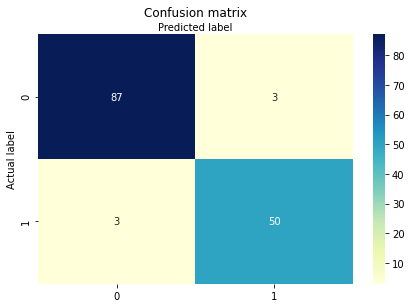

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9122807017543859

# Decision Tree

In [ ]:
#remapping our labels
y = data['diagnosis'].map({'M':1, 'B':0})
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

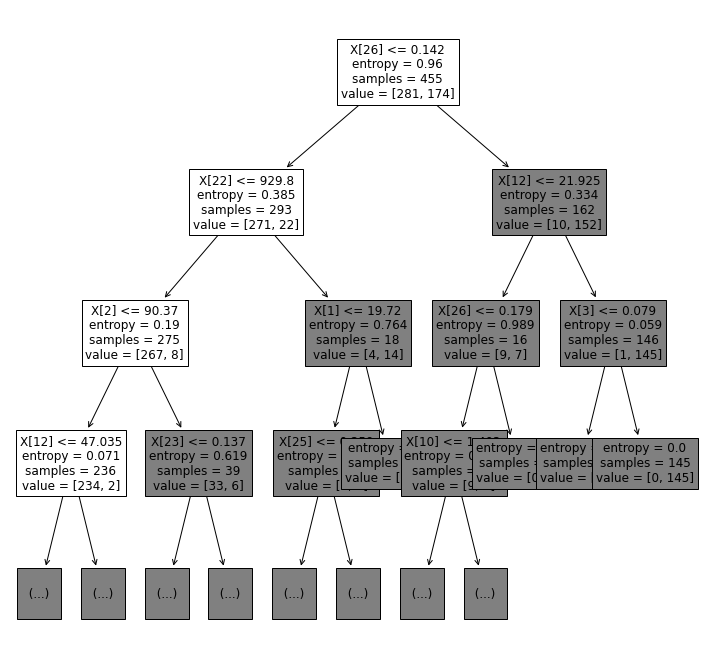

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

In [ ]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9122807017543859

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


# XGBoost with display of feature importance

In [ ]:
from matplotlib import pyplot
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier() 
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from xgboost import plot_importance 
print(model.feature_importances_)

[0.01211924 0.01440776 0.         0.00520934 0.00289881 0.00477262
 0.12008406 0.00398051 0.00532264 0.0093048  0.023575   0.00642988
 0.00864926 0.01058711 0.00411414 0.01409929 0.04488714 0.0015969
 0.00236797 0.33272734 0.01757974 0.2167394  0.01424663 0.00780113
 0.00244701 0.01802957 0.08712263 0.00253452 0.00636559]


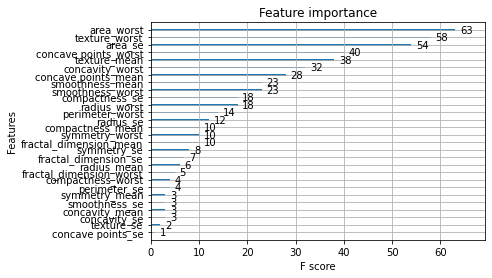

In [ ]:
plot_importance(model,importance_type='weight')
pyplot.show()

# Neural Network (Keras)
Binary classification

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
#29 features, so an input shape of 29 layers
#single neuron network because we are doing a binary classification (determining either: malignant or benign)
model = Sequential()
model.add(Dense(1, input_shape=(29,), activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=50)
accuracy= model.evaluate(X_test,y_test)[1]

Epoch 1/50
15/15 [==============================] - 0s 1ms/step - loss: 1063.4617 - accuracy: 0.4513
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 724.1879 - accuracy: 0.5036
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 807.6549 - accuracy: 0.5356
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 951.6137 - accuracy: 0.4830
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 666.7960 - accuracy: 0.5040
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 679.9861 - accuracy: 0.5430
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 762.6506 - accuracy: 0.5135
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 487.6520 - accuracy: 0.6606
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 284.5905 - accuracy: 0.7642
Epoch 10/50
15/15 [==============================] - 0s 1ms/step - loss: 634.0759 - accuracy: 0.570

In [ ]:
print('accuracy:', accuracy)

accuracy: 0.9035087823867798


# Neural Network (Pytorch)



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

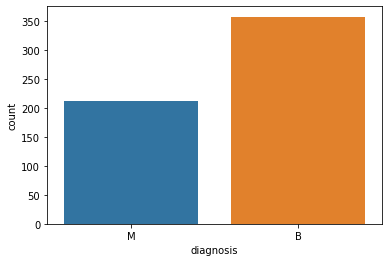

In [ ]:
#class imbalance barplot
sns.countplot(x = 'diagnosis', data=data)

In [ ]:
#remapping our labels
data['diagnosis'] = data['diagnosis'].astype('category')
encode_map = {
    'M': 1,
    'B': 0
}
data['diagnosis'].replace(encode_map, inplace=True)

In [ ]:
#Defining our feature and target variables (we did this already but showing again)
features = ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean",
            "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
            "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
           "smoothness_se", "compactness_se", "concavity_se","concave points_se", "symmetry_se",
           "fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst",
           "smoothness_worst", "compactness_worst","concavity_worst", "concave points_worst",
           "symmetry_worst", "fractal_dimension_worst"]

In [ ]:
#Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
#standadizing the inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 29) (426,)
(143, 29) (143,)


In [ ]:
#setting up hyper parameters
EPOCHS = 50
BATCH_SIZE = len(X_train)
LEARNING_RATE = 0.001

In [ ]:
##define dataloader
## training data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## testing data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [ ]:
#initialize dataloader
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
#building neural network
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 29.
        #input layer for the 29 features 
        #output will be value between 0 and 1
        # 2 hidden layers between input and output
        self.layer_1 = nn.Linear(29, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
#gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
#initialize optimizer
#using BCE loss function - measures difference between 2 binary vectrs and were doing binary classification
model = binaryClassification()
model.to(device)
print(model)
#loss function
criterion = nn.BCEWithLogitsLoss()
#initializing optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=29, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
#calculating accuracy
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    #print out epoch number, loss and accuracy value
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.63762 | Acc: 64.000
Epoch 002: | Loss: 0.55175 | Acc: 76.000
Epoch 003: | Loss: 0.47951 | Acc: 86.000
Epoch 004: | Loss: 0.42343 | Acc: 88.000
Epoch 005: | Loss: 0.38372 | Acc: 89.000
Epoch 006: | Loss: 0.34247 | Acc: 92.000
Epoch 007: | Loss: 0.31497 | Acc: 92.000
Epoch 008: | Loss: 0.29215 | Acc: 92.000
Epoch 009: | Loss: 0.27644 | Acc: 93.000
Epoch 010: | Loss: 0.25740 | Acc: 93.000
Epoch 011: | Loss: 0.24082 | Acc: 94.000
Epoch 012: | Loss: 0.23050 | Acc: 94.000
Epoch 013: | Loss: 0.21900 | Acc: 95.000
Epoch 014: | Loss: 0.20636 | Acc: 95.000
Epoch 015: | Loss: 0.19934 | Acc: 96.000
Epoch 016: | Loss: 0.18702 | Acc: 96.000
Epoch 017: | Loss: 0.18075 | Acc: 96.000
Epoch 018: | Loss: 0.17171 | Acc: 96.000
Epoch 019: | Loss: 0.16539 | Acc: 97.000
Epoch 020: | Loss: 0.15660 | Acc: 96.000
Epoch 021: | Loss: 0.15090 | Acc: 98.000
Epoch 022: | Loss: 0.14943 | Acc: 97.000
Epoch 023: | Loss: 0.14329 | Acc: 97.000
Epoch 024: | Loss: 0.13893 | Acc: 97.000
Epoch 025: | Los

In [ ]:
#define list to hold all predictions
y_pred_list = []

#call model.eval() to test model
model.eval()

with torch.no_grad():
    for X_batch in test_loader:

        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        #round probabilities
        y_pred_tag = torch.round(y_test_pred)
        #move batch from gpu to cpu
        y_pred_list.append(y_pred_tag.cpu().numpy())

#flatten list to put in confusion matrix and classification report
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
cm = confusion_matrix(y_test, y_pred_list)
cm

array([[87,  3],
       [ 2, 51]])

Text(0.5, 257.44, 'Predicted label')

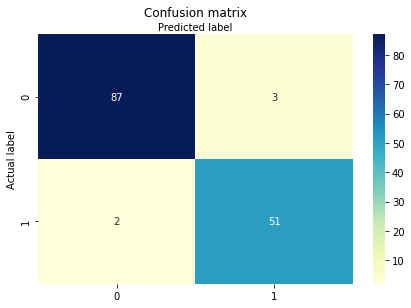

In [ ]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



Some Visualizations

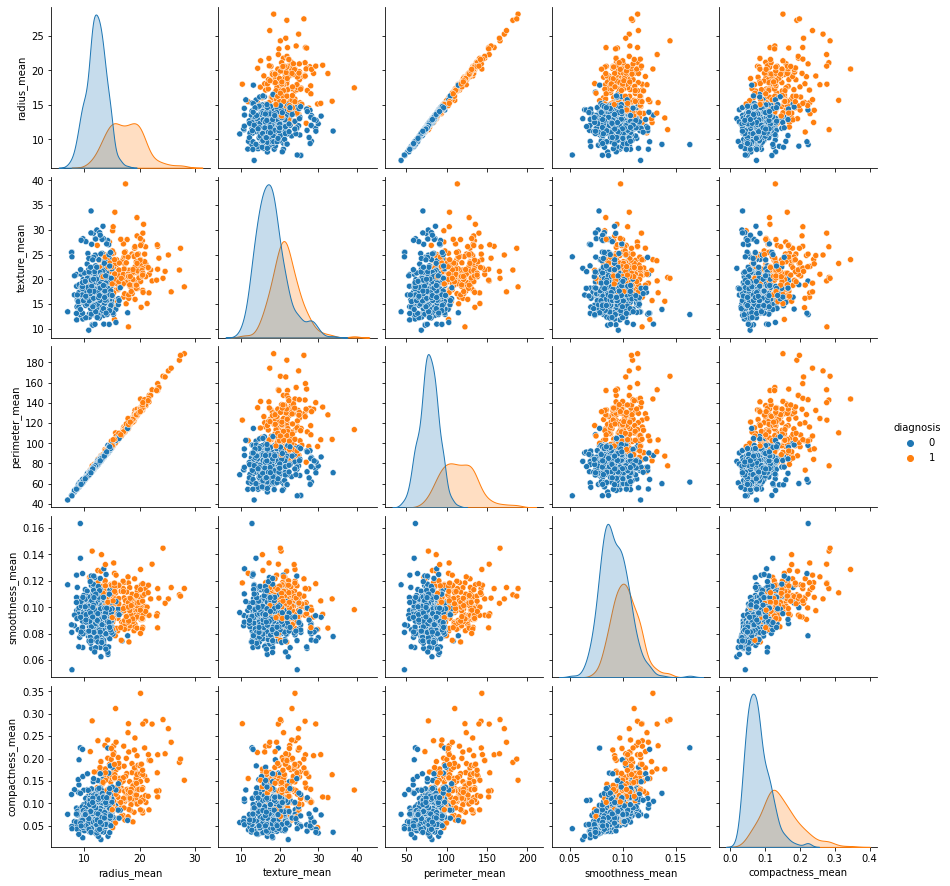

In [ ]:
sns.pairplot(data, vars= ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean",
            "compactness_mean"], hue ="diagnosis")

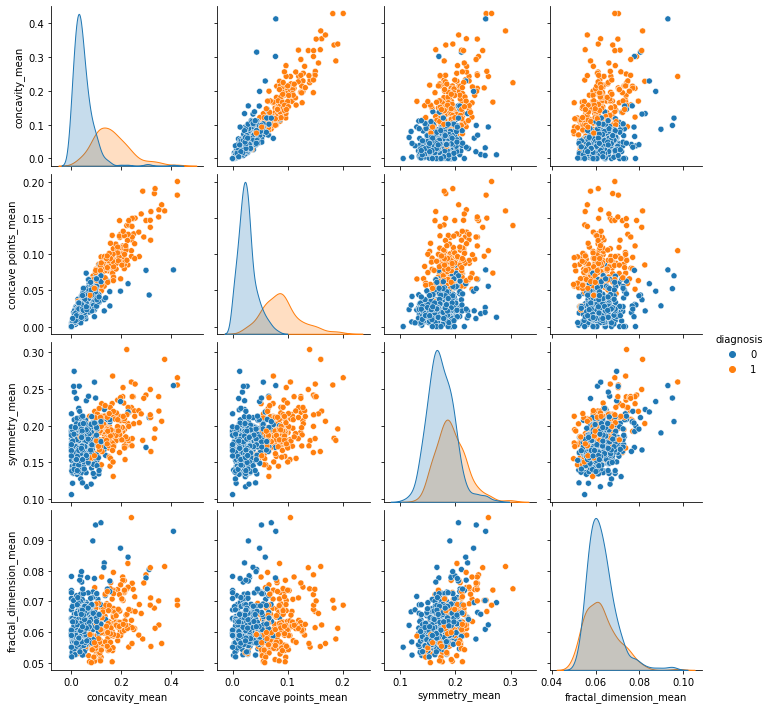

In [ ]:
sns.pairplot(data, vars= ["concavity_mean", "concave points_mean", "symmetry_mean",
                          "fractal_dimension_mean"], hue ="diagnosis")